# Import Module

In [818]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import os

# Load the data

In [819]:
labelled_data = pd.read_excel(r'D:\Code\py_code\Text-Processing\data\labelled\labeled_updated_v2.xlsx')
labelled_data.head()

,full_text,label
0,aku ga pernah punya pengalaman serupa tapi be...,0
1,Wuiiih perpanjang kontrak dgn red spark Megawa...,0
2,Ada 3 kepastian di dunia ini: 1) Kematian 2) P...,0
3,Pemerintahan Joe Biden membakar uang pajak war...,0
4,Indonesia memburuk sangat cepat marilah bangki...,0


In [820]:
labelled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  1533 non-null   object
 1   label      1533 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.1+ KB


In [821]:
labelled_data.describe()

,label
count,1533.000000
mean,0.161774
std,0.368364
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [822]:
temp = labelled_data.groupby('label').count()['full_text'].reset_index().sort_values(by='full_text',ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,label,full_text
0,0,1285
1,1,248


In [823]:
fig = go.Figure(go.Funnelarea(
    text = 
    temp.label,
    values = temp.full_text,
    title = {"position": "top center", "text": "Funnel-Chart dari Distribusi target"}
    ))

fig.show()

# Text Preprocessing

In [824]:
import string 
import re

from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

### Case Folding (Lowercase)

In [825]:
labelled_data['full_text'] = labelled_data['full_text'].str.lower()
labelled_data.head()

,full_text,label
0,aku ga pernah punya pengalaman serupa tapi be...,0
1,wuiiih perpanjang kontrak dgn red spark megawa...,0
2,ada 3 kepastian di dunia ini: 1) kematian 2) p...,0
3,pemerintahan joe biden membakar uang pajak war...,0
4,indonesia memburuk sangat cepat marilah bangki...,0


### Remove URL link

In [826]:
def remove_tweet_special(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(http://|https://)\S+", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

In [827]:
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_tweet_special)
labelled_data.head()

,full_text,label
0,aku ga pernah punya pengalaman serupa tapi bea...,0
1,wuiiih perpanjang kontrak dgn red spark megawa...,0
2,ada 3 kepastian di dunia ini: 1) kematian 2) p...,0
3,pemerintahan joe biden membakar uang pajak war...,0
4,indonesia memburuk sangat cepat marilah bangki...,0


### Remove Numbers

In [828]:
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

In [829]:
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_number)
labelled_data.head()

,full_text,label
0,aku ga pernah punya pengalaman serupa tapi bea...,0
1,wuiiih perpanjang kontrak dgn red spark megawa...,0
2,ada kepastian di dunia ini: ) kematian ) p...,0
3,pemerintahan joe biden membakar uang pajak war...,0
4,indonesia memburuk sangat cepat marilah bangki...,0


### Remove Punctuation

In [830]:
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

In [831]:
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_punctuation)
labelled_data.head()

,full_text,label
0,aku ga pernah punya pengalaman serupa tapi bea...,0
1,wuiiih perpanjang kontrak dgn red spark megawa...,0
2,ada kepastian di dunia ini kematian paja...,0
3,pemerintahan joe biden membakar uang pajak war...,0
4,indonesia memburuk sangat cepat marilah bangki...,0


### Remove Whitespace

In [832]:
def remove_whitespace_lt(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub(r'\s+',' ',text)

In [833]:
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_whitespace_lt)
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_whitespace_multiple)
labelled_data.head()

,full_text,label
0,aku ga pernah punya pengalaman serupa tapi bea...,0
1,wuiiih perpanjang kontrak dgn red spark megawa...,0
2,ada kepastian di dunia ini kematian pajak baye...,0
3,pemerintahan joe biden membakar uang pajak war...,0
4,indonesia memburuk sangat cepat marilah bangki...,0


### Remove Single Character

In [834]:
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

In [835]:
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_singl_char)
labelled_data.head()

,full_text,label
0,aku ga pernah punya pengalaman serupa tapi bea...,0
1,wuiiih perpanjang kontrak dgn red spark megawa...,0
2,ada kepastian di dunia ini kematian pajak baye...,0
3,pemerintahan joe biden membakar uang pajak war...,0
4,indonesia memburuk sangat cepat marilah bangki...,0


### Tokenization

In [836]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [837]:
labelled_data['tweet_tokens'] = labelled_data['full_text'].apply(word_tokenize_wrapper)
labelled_data.head()

,full_text,label,tweet_tokens
0,aku ga pernah punya pengalaman serupa tapi bea...,0,"[aku, ga, pernah, punya, pengalaman, serupa, t..."
1,wuiiih perpanjang kontrak dgn red spark megawa...,0,"[wuiiih, perpanjang, kontrak, dgn, red, spark,..."
2,ada kepastian di dunia ini kematian pajak baye...,0,"[ada, kepastian, di, dunia, ini, kematian, paj..."
3,pemerintahan joe biden membakar uang pajak war...,0,"[pemerintahan, joe, biden, membakar, uang, paj..."
4,indonesia memburuk sangat cepat marilah bangki...,0,"[indonesia, memburuk, sangat, cepat, marilah, ..."


### Stopwords

In [838]:
from nltk.corpus import stopwords

In [839]:
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)

In [840]:
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [841]:
labelled_data['tweet_tokens_wsw'] = labelled_data['tweet_tokens'].apply(stopwords_removal)
labelled_data.head()

,full_text,label,tweet_tokens,tweet_tokens_wsw
0,aku ga pernah punya pengalaman serupa tapi bea...,0,"[aku, ga, pernah, punya, pengalaman, serupa, t...","[pengalaman, bea, cukai, kerjaannya, dah, liat..."
1,wuiiih perpanjang kontrak dgn red spark megawa...,0,"[wuiiih, perpanjang, kontrak, dgn, red, spark,...","[wuiiih, perpanjang, kontrak, red, spark, mega..."
2,ada kepastian di dunia ini kematian pajak baye...,0,"[ada, kepastian, di, dunia, ini, kematian, paj...","[kepastian, dunia, kematian, pajak, bayer, lev..."
3,pemerintahan joe biden membakar uang pajak war...,0,"[pemerintahan, joe, biden, membakar, uang, paj...","[pemerintahan, joe, biden, membakar, uang, paj..."
4,indonesia memburuk sangat cepat marilah bangki...,0,"[indonesia, memburuk, sangat, cepat, marilah, ...","[indonesia, memburuk, cepat, marilah, bangkit,..."


### Stemming

In [842]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
from tqdm import tqdm

In [843]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [844]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in labelled_data['tweet_tokens_wsw']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in tqdm(term_dict):
    term_dict[term] = stemmed_wrapper(term)

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

100%|██████████| 7158/7158 [06:38<00:00, 17.98it/s]


In [845]:
labelled_data['tweet_tokens_stemmed'] = labelled_data['tweet_tokens_wsw'].swifter.apply(get_stemmed_term)
labelled_data.head()

Pandas Apply: 100%|██████████| 1533/1533 [00:00<00:00, 138952.07it/s]


,full_text,label,tweet_tokens,tweet_tokens_wsw,tweet_tokens_stemmed
0,aku ga pernah punya pengalaman serupa tapi bea...,0,"[aku, ga, pernah, punya, pengalaman, serupa, t...","[pengalaman, bea, cukai, kerjaannya, dah, liat...","[alam, bea, cukai, kerja, dah, liat, berita, s..."
1,wuiiih perpanjang kontrak dgn red spark megawa...,0,"[wuiiih, perpanjang, kontrak, dgn, red, spark,...","[wuiiih, perpanjang, kontrak, red, spark, mega...","[wuiiih, panjang, kontrak, red, spark, megawat..."
2,ada kepastian di dunia ini kematian pajak baye...,0,"[ada, kepastian, di, dunia, ini, kematian, paj...","[kepastian, dunia, kematian, pajak, bayer, lev...","[pasti, dunia, mati, pajak, bayer, leverkusen,..."
3,pemerintahan joe biden membakar uang pajak war...,0,"[pemerintahan, joe, biden, membakar, uang, paj...","[pemerintahan, joe, biden, membakar, uang, paj...","[perintah, joe, biden, bakar, uang, pajak, war..."
4,indonesia memburuk sangat cepat marilah bangki...,0,"[indonesia, memburuk, sangat, cepat, marilah, ...","[indonesia, memburuk, cepat, marilah, bangkit,...","[indonesia, buruk, cepat, mari, bangkit, sauda..."


In [846]:
labelled_data = labelled_data.dropna()
labelled_data.to_csv(r'D:\Code\py_code\Text-Processing\data\clean\preprocessed_data.csv', index=False)

# TF-IDF

### Prepare Corpus

In [847]:
import ast

In [848]:
processed_data = pd.read_csv(r'D:\Code\py_code\Text-Processing\data\clean\preprocessed_data.csv')
processed_data.head()

,full_text,label,tweet_tokens,tweet_tokens_wsw,tweet_tokens_stemmed
0,aku ga pernah punya pengalaman serupa tapi bea...,0,"['aku', 'ga', 'pernah', 'punya', 'pengalaman',...","['pengalaman', 'bea', 'cukai', 'kerjaannya', '...","['alam', 'bea', 'cukai', 'kerja', 'dah', 'liat..."
1,wuiiih perpanjang kontrak dgn red spark megawa...,0,"['wuiiih', 'perpanjang', 'kontrak', 'dgn', 're...","['wuiiih', 'perpanjang', 'kontrak', 'red', 'sp...","['wuiiih', 'panjang', 'kontrak', 'red', 'spark..."
2,ada kepastian di dunia ini kematian pajak baye...,0,"['ada', 'kepastian', 'di', 'dunia', 'ini', 'ke...","['kepastian', 'dunia', 'kematian', 'pajak', 'b...","['pasti', 'dunia', 'mati', 'pajak', 'bayer', '..."
3,pemerintahan joe biden membakar uang pajak war...,0,"['pemerintahan', 'joe', 'biden', 'membakar', '...","['pemerintahan', 'joe', 'biden', 'membakar', '...","['perintah', 'joe', 'biden', 'bakar', 'uang', ..."
4,indonesia memburuk sangat cepat marilah bangki...,0,"['indonesia', 'memburuk', 'sangat', 'cepat', '...","['indonesia', 'memburuk', 'cepat', 'marilah', ...","['indonesia', 'buruk', 'cepat', 'mari', 'bangk..."


In [849]:
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

In [850]:
processed_data['tweet_join'] = processed_data['tweet_tokens_stemmed'].apply(join_text_list)
processed_data = processed_data[['tweet_join', 'label']]
processed_data.columns = ['tweet', 'label']
processed_data.head()

,tweet,label
0,alam bea cukai kerja dah liat berita seliwer k...,0
1,wuiiih panjang kontrak red spark megawati gaji...,0
2,pasti dunia mati pajak bayer leverkusen gol menit,0
3,perintah joe biden bakar uang pajak warga amer...,0
4,indonesia buruk cepat mari bangkit saudarakuh ...,0


### TF-IDF Vectorization

In [851]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(processed_data['tweet']) 

In [852]:
def tf_idf_calculator(data):
    tf_idf = TfidfVectorizer(max_features=1000, binary=True)
    tfidf_mat = tf_idf.fit_transform(data["tweet"]).toarray()
    terms = tf_idf.get_feature_names_out()

    # Word count calculation
    word_counts = {}
    for doc in data["tweet"]:
        for word in doc.split():
            word_counts[word] = word_counts.get(word, 0) + 1

    # Create the DataFrame
    temp = []
    for col, term in enumerate(terms):
        temp.append({
            'term': term,
            'rank': tfidf_mat.sum(axis=0)[col],
            'count': word_counts.get(term, 0)  # Get count from word_counts
        })

    ranking = pd.DataFrame(temp)
    ranking = ranking.sort_values('rank', ascending=False)

    return ranking

In [853]:
ranking = tf_idf_calculator(processed_data)
ranking.head()

,term,rank,count
662,pajak,124.964335,1777
90,bayar,65.277616,447
756,rakyat,38.213433,251
95,bea,34.023163,185
433,kena,33.832167,194


### Visualization

In [854]:
fig = px.bar(ranking.head(25), x="count", y="term", title='Common Words in Selected Text', orientation='h',  width=700, height=700, color='term')
fig.show()

In [855]:
fig = px.treemap(ranking.head(25), path=['term'], values='count',title='Tree of Most Common Words')
fig.show()

In [856]:
def word_cloud(data, title, label):
    df = data[data['label'] == label]
    all_words = ' '.join([twts for twts in df['tweet']])
    wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110, background_color="white").generate(all_words)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

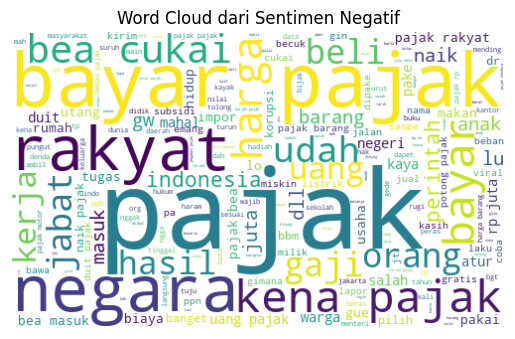

In [857]:
word_cloud(processed_data, 'Word Cloud dari Sentimen Negatif', 0)

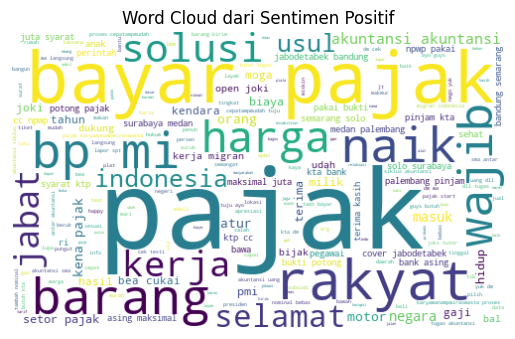

In [858]:
word_cloud(processed_data, 'Word Cloud dari Sentimen Positif', 1)

# Random Forest

### Split the data

In [859]:
from sklearn.model_selection import train_test_split

X_data = processed_data['tweet']

X_train, X_test, y_train, y_test = train_test_split(X_data, processed_data['label'], test_size=0.3, random_state=42, stratify=processed_data['label'])
X_train.shape, X_test.shape

((1073,), (460,))

In [860]:
X_train

83                                  pajak transportasi cc
1180    viral sepatu online rp juta kena pajak rp juta...
378                          hukum kantor pajak bea cukai
404     tenang prabowo hitung bocor triliun tambal per...
76      pajak pbb rakyat udah pinter masuk akal bayar ...
                              ...                        
258                                        joki pajak pls
646     pajak rakyat gaji sampah kayak udah mesum cura...
970     kumpul presiden capres artis guna uang pajak b...
628     open konsultasibimbingan skripsita pajak akunt...
555                                 layak apresiasi pajak
Name: tweet, Length: 1073, dtype: object

In [861]:
y_train.value_counts()

label
0    899
1    174
Name: count, dtype: int64

In [862]:
X_test

777     usaha kerja keras buang siasia apa kerja patut...
1204                                             ale pajk
1002    follawers pajak kena makan restoran pajak bara...
445     dapat negara utama bumn capek ngegendong negar...
633          need joki paper teliti pajak bab doang cepat
                              ...                        
435                                       pajak jabat syl
1387    info sertifikasi pajak akutansi trusted mana work
239     open joki tutor tugas akuntansi akuntansi sma ...
1092    pilih pilih miskin program makan siang gratis ...
988                                    uda garap sm pajak
Name: tweet, Length: 460, dtype: object

### Vectorization

In [863]:
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### SMOTE for Imbalanced Classification

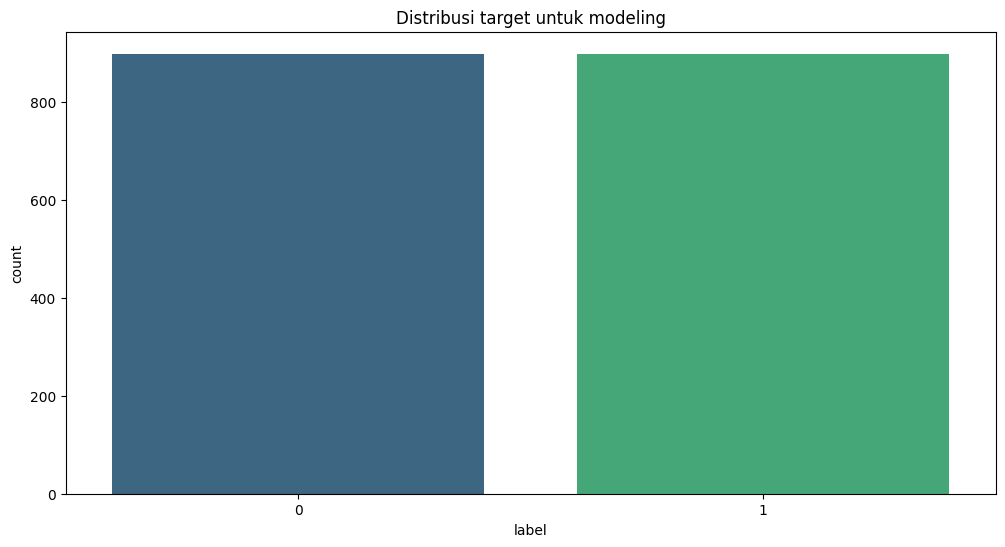

In [864]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

smote_tomek = SMOTETomek(random_state=42)
X_train_tfidf, y_train = smote_tomek.fit_resample(X_train_tfidf, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribusi target untuk modeling')
plt.show()

In [865]:
y_train.value_counts()

label
0    899
1    899
Name: count, dtype: int64

### Implementing Machine Learning Models (Find best parameter)

In [866]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [867]:
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [None, 10, 20, 30, 40],  
    'min_samples_split': [2, 4, 6, 8, 10],  
    'min_samples_leaf': [1, 2, 3, 4],  
    'max_features': ['sqrt', 'log2', 0.5, None],  
    'bootstrap': [True, False],  
    'criterion': ['gini', 'entropy']  
}

scoring = {'accuracy': 'accuracy', 'f1_score': 'f1', 'roc_auc': 'roc_auc'}

In [868]:
rf_search = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

rf_random_search = RandomizedSearchCV(
    estimator=rf_search,
    param_distributions=rf_param_grid,
    n_iter=50,  
    cv=cv,
    scoring=scoring,
    refit='f1_score',  
    random_state=42,
    n_jobs=-1,
)
rf_random_search.fit(X_train_tfidf, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', 0.5,
                                                         None],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, refit='f1_score',
                   scoring={'accuracy': 'accuracy', 'f1_score': 'f1',
                            'roc_auc': 'roc_auc'})

In [869]:
print("\nBest Parameters for Random Forest:", rf_random_search.best_params_)


Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}


### Get the predictions

In [870]:
best_rf = rf_random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_tfidf)

tested_data = pd.DataFrame({'tweet': X_test, 'label': y_test, 'prediction': y_pred_rf})
tested_data.to_excel(r'D:\Code\py_code\Text-Processing\data\labelled\tested_data.xlsx', index=False)
tested_data.head()

,tweet,label,prediction
777,usaha kerja keras buang siasia apa kerja patut...,1,0
1204,ale pajk,0,0
1002,follawers pajak kena makan restoran pajak bara...,0,0
445,dapat negara utama bumn capek ngegendong negar...,0,0
633,need joki paper teliti pajak bab doang cepat,1,0


### Model Evaluation

In [871]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       386
           1       0.60      0.16      0.26        74

    accuracy                           0.85       460
   macro avg       0.73      0.57      0.59       460
weighted avg       0.82      0.85      0.81       460



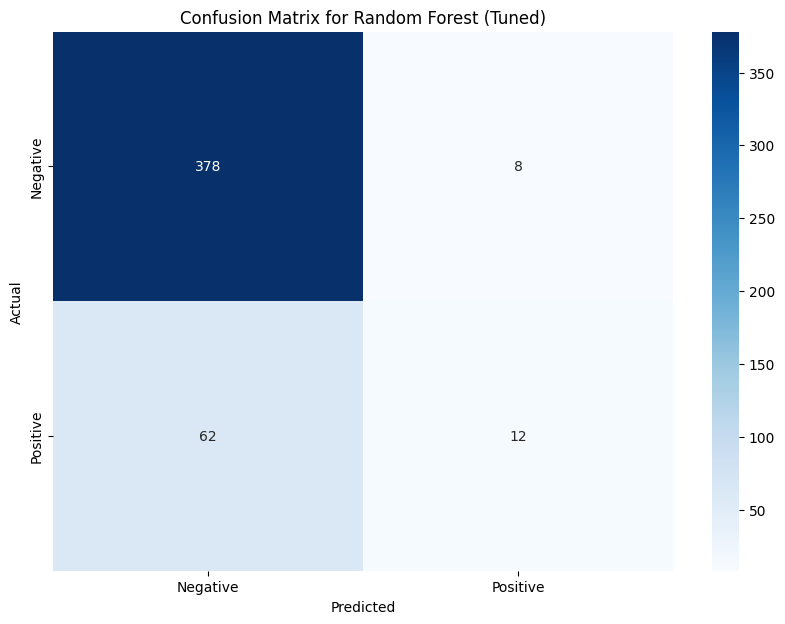

In [875]:
# Assuming y_test is your true labels and y_pred_rf is your model's predictions
cm = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (Tuned)')
plt.show()

Important Features

In [873]:
# Get feature importances from the model
importances = best_rf.feature_importances_

# Assuming feature names are obtained from a TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a pandas DataFrame to view the feature importances clearly
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance and select the top 20
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(20)

# Display the top 20 feature importances
print("Top 20 Feature Importances:")
print(feature_importances)

Top 20 Feature Importances:
           Feature  Importance
15172        pajak    0.018095
11906   lupa bayar    0.005239
19454        setor    0.004629
2048   bayar pajak    0.004539
11904         lupa    0.004059
19456  setor pajak    0.003969
1982         bayar    0.003317
12348         mari    0.002889
1286           ayo    0.002345
13480           my    0.002282
12160       makmur    0.002190
22080         uang    0.002168
13195         moga    0.002164
1289     ayo bayar    0.002091
19214     semangat    0.002019
5320          duit    0.001960
13712       negara    0.001941
9050          joki    0.001843
17756       rakyat    0.001750
2164           bea    0.001726


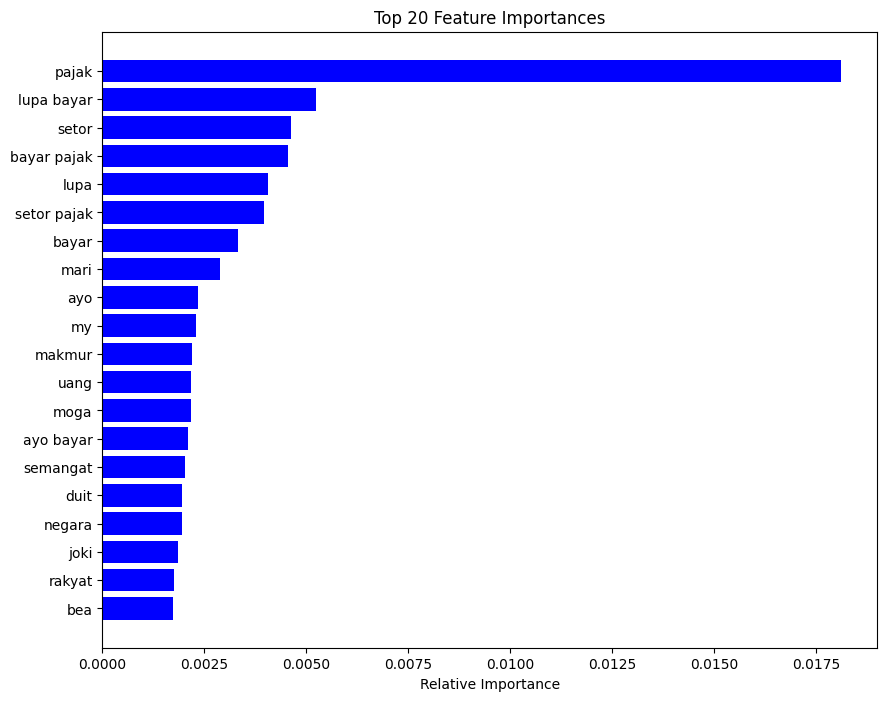

In [874]:
# Plotting the top 20 features
plt.figure(figsize=(10, 8))
plt.title('Top 20 Feature Importances')
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='b')
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()